# EXERCICIO7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [3]:
np.random.seed(0)

#Input datasets
XX = np.array([[0,0],[0,1],[1,0],[1,1]])
YY = np.array([[0],[1],[1],[0]])

epochs = 10000
learning_rate = 0.1

# Uma Input tlayer com dois neurónios
inputLayerNeurons = 2

# Uma Hidden Layer com dois neurónios
hiddenLayerNeurons = 2

# Uma Output layer com um neurónio
outputLayerNeurons = 1

# Inicialização dos pesos
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))

hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))

output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))

output_bias = np.random.uniform(size=(1,outputLayerNeurons))


# Treinamento
for _ in range(epochs):
    
    #Forward Propagation
    hidden_layer_activation = np.dot(XX,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    y_pred = sigmoid(output_layer_activation)

    #Backpropagation
    error = YY - y_pred
    d_predicted_output = error * sigmoid_derivative(y_pred)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Actualização de pesos e Bias
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * learning_rate
    hidden_weights += XX.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * learning_rate



In [4]:
print((y_pred >= 0.5  ) +0)

[[0]
 [1]
 [1]
 [0]]


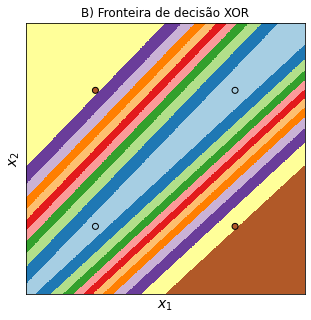

In [5]:

X = np.array([[1,0, 0],
[1,0, 1],
[1,1, 0],
[1,1, 1]],
dtype=np.double)

y = np.array([0, 1, 1, 0])


mlp = MLPClassifier(hidden_layer_sizes=(2,),
        max_iter=10000, random_state= 0)
    
mlp.fit(X, y)


x_min, x_max = np.min(X[:, 1]) - .5, np.max(X[:, 1]) + .5
y_min, y_max = np.min(X[:, 2]) - .5, np.max(X[:, 2]) + .5
h = 0.002 # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

xAxis = xx.ravel()[:, np.newaxis]
    
yAxis = yy.ravel()[:, np.newaxis]    
    
hstack = np.hstack((xAxis, yAxis))
    
# Introduzindo vector de 1s
hstack = (np.c_[np.ones((len(hstack), 1)),  hstack])

Z = mlp.predict_proba(hstack)[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
    
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('B) Fronteira de decisão XOR')


plt.show()
pred = mlp.predict_proba(X)

In [6]:
print('Score do teste ', mlp.score(X,y))

Score do teste  1.0


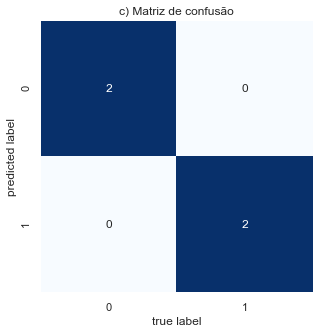

In [7]:
y_reshape = y.reshape(len(y),1)



y_pred_class = (y_pred > 0.5) +0




# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_reshape, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('c) Matriz de confusão')
plt.show()


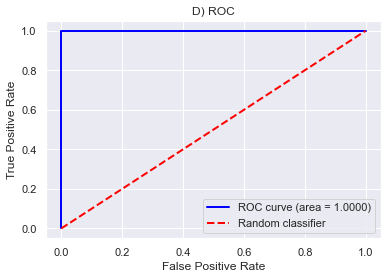

In [8]:

y_reshape = y.reshape(len(y),1)
# Getting the probabilities for each class.
y_prob = pred
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_reshape, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('D) ROC')
plt.legend(loc="lower right")
plt.show()

In [9]:
print('Área Abaixo da curva', roc_auc_score(y_reshape, y_prob[:, 1]))

Área Abaixo da curva 1.0


**E. Baseado na curva ROC, qual a área sob a curva?**

R: A área sob a curva será 0